### Pearson Correlation Coefficient (PCC)

In [ ]:
import sys
sys.path.append('../../struc2mapGAN')

import mrcfile
import pandas as pd
from evaluation.eval_funcs import calculate_pcc

In [ ]:
# Calculate PCC: Simulated vs. Experimental and GAN vs. Experimental
df_csv = pd.read_csv('../paper_benchmark/inference_data.csv', dtype=str)
pdb_list = df_csv['PDBID']
emd_list = df_csv['EMID']

mode = 'molmap_ogres'

for i in range(len(pdb_list)):
    
    try:
        pdb = pdb_list[i]
        emd = emd_list[i]
        m1 = f'../paper_benchmark/data/raw_map_pdb/emd_{emd}.map'
        m2 = f'../paper_benchmark/data/{mode}/{pdb}_{mode}_resample.mrc'

        with mrcfile.open(m1, mode='r') as mrc1, mrcfile.open(m2, mode='r') as mrc2:
            density_map1 = mrc1.data
            density_map2 = mrc2.data

        # Calculate PCC
        pcc = calculate_pcc(density_map1, density_map2, percentile=90)
        
        print(f"PCC between {mode} and experimental maps PDB-{pdb}: {pcc}")
        
        # break
    
        df_csv.loc[i, f'PCC_{mode}'] = pcc
        df_csv.to_csv('../paper_benchmark/inference_data.csv', index=False)  
        
         
    except Exception as e:
        print(f"Error: {e}")
        continue


### Cosine Similarity (Correlation)

In [ ]:
import sys
sys.path.append('../../struc2mapGAN')

import mrcfile
import pandas as pd
from evaluation.eval_funcs import calculate_cosine

In [ ]:
# # Calculate PCC: Simulated vs. Experimental and GAN vs. Experimental
# df_csv = pd.read_csv('../paper_benchmark/inference_data.csv', dtype=str)
# pdb_list = df_csv['PDBID']
# emd_list = df_csv['EMID']

# mode='gan'

# for i in range(len(pdb_list)):

#     pdb = pdb_list[i]
#     emd = emd_list[i]
#     pdb = '8i2h'
#     emd = '35136'
#     print(pdb, emd)
    
#     map1 = f'../paper_benchmark/data/raw_map_pdb/emd_{emd}.map' # as reference
#     # map2 = f'../paper_benchmark/data/{mode}/{pdb}_{mode}_resample.mrc'
#     map2 = f'../paper_benchmark/data/{mode}/{pdb}_24-0517-132907-last_pdb2vol_{mode}_resample.mrc'
    
    
#     correlation, correlation_about_mean = calculate_cosine(map1, map2)
    
#     print(f"Correlation between {mode} and experimental maps PDB-{pdb}: {correlation}, {correlation_about_mean}")
    
#     break
    
#     df_csv.loc[i, f'Correlation_{mode}'] = correlation
#     df_csv.loc[i, f'Correlation_About_Mean_{mode}'] = correlation_about_mean
#     df_csv.to_csv('../paper_benchmark/inference_data.csv', index=False)  


In [ ]:
# Calculate PCC: Simulated vs. Experimental and GAN vs. Experimental
df_csv = pd.read_csv('../paper_benchmark/inference_data.csv', dtype=str)
pdb_list = df_csv['PDBID']
emd_list = df_csv['EMID']

# mode='gan'
mode = 'molmap_ogres'

for i in range(len(pdb_list)):
    
    try:
        pdb = pdb_list[i]
        emd = emd_list[i]
        map1 = f'../paper_benchmark/data/raw_map_pdb/emd_{emd}.map' # as reference
        map2 = f'../paper_benchmark/data/{mode}/{pdb}_{mode}_resample.mrc'
        
        correlation, correlation_about_mean = calculate_cosine(map1, map2)
        
        print(f"Correlation between {mode} and experimental maps PDB-{pdb}: {correlation}, {correlation_about_mean}")
        
        # break
        
        df_csv.loc[i, f'Correlation_{mode}'] = correlation
        df_csv.loc[i, f'Correlation_About_Mean_{mode}'] = correlation_about_mean
        df_csv.to_csv('../paper_benchmark/inference_data.csv', index=False)  
        
    except Exception as e:
        print(f"Error: {e}")
        continue

### SSIM

In [ ]:
import sys
sys.path.append('../../struc2mapGAN')

import mrcfile
import pandas as pd
from evaluation.eval_funcs import calculate_ssim

In [ ]:
# Calculate SSIM: Simulated vs. Experimental and GAN vs. Experimental
df_csv = pd.read_csv('../paper_benchmark/inference_data.csv', dtype=str)
pdb_list = df_csv['PDBID']
emd_list = df_csv['EMID']

# mode = 'e2pdb2mrc'
mode = 'molmap_ogres'


for i in range(len(pdb_list)):
    
    pdb = pdb_list[i]
    emd = emd_list[i]
    # experimental map
    m1 = f'../paper_benchmark/data/raw_map_pdb/emd_{emd}.map'
    m2 = f'../paper_benchmark/data/{mode}/{pdb}_{mode}_resample.mrc'
    

    with mrcfile.open(m1, mode='r') as mrc1, mrcfile.open(m2, mode='r') as mrc2:        
        density_map1 = mrc1.data
        density_map2 = mrc2.data
        
    # Calculate SSIM
    ssim = calculate_ssim(density_map1, density_map2)
    
    print(f"SSIM between {mode} and experimental maps PDB-{pdb}: {ssim}")
    
    # break

    df_csv.loc[i, f'SSIM_{mode}'] = ssim
    df_csv.to_csv('../paper_benchmark/inference_data.csv', index=False)

### Load Data

In [1]:
# plots for PCC and SSIM
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_csv = pd.read_csv('../paper_benchmark/inference_data.csv', dtype={'PDBID': str, 'EMID': str})
pdb_list = df_csv['PDBID'].to_numpy()
emd_list = df_csv['EMID'].to_numpy()
resolution_list = df_csv['Resolution'].to_numpy()
inference_time_list = df_csv['Inference-Time (s)'].to_numpy()

df = pd.DataFrame({
    'PDB': df_csv['PDBID'],
    'EMDB': df_csv['EMID'],
    'Resolution': df_csv['Resolution'],
    'Inference time (s)': df_csv['Inference-Time (s)'],
    'PCC-GAN': df_csv['PCC_gan'],
    'PCC-StructureBlurrer': df_csv['PCC_StructureBlurrer'],
    'PCC-molmap': df_csv['PCC_molmap'],
    'PCC-e2pdb2mrc': df_csv['PCC_e2pdb2mrc'],
    'SSIM-GAN': df_csv['SSIM_gan'],
    'SSIM-StructureBlurrer': df_csv['SSIM_StructureBlurrer'],
    'SSIM-molmap': df_csv['SSIM_molmap'],
    'SSIM-e2pdb2mrc': df_csv['SSIM_e2pdb2mrc'],
    'Correlation-GAN': df_csv['Correlation_gan'],
    'Correlation-StructureBlurrer': df_csv['Correlation_StructureBlurrer'],
    'Correlation-molmap': df_csv['Correlation_molmap'],
    'Correlation-e2pdb2mrc': df_csv['Correlation_e2pdb2mrc'],
    'Correlation_Average-GAN': df_csv['Correlation_About_Mean_gan'],
    'Correlation_Average-StructureBlurrer': df_csv['Correlation_About_Mean_StructureBlurrer'],
    'Correlation_Average-molmap': df_csv['Correlation_About_Mean_molmap'],
    'Correlation_Average-e2pdb2mrc': df_csv['Correlation_About_Mean_e2pdb2mrc'],
    # Ablation
    'PCC-GAN-Ablation': df_csv['PCC_gan_ablation'],
    'SSIM-GAN-Ablation': df_csv['SSIM_gan_ablation'],
    'Correlation-GAN-Ablation': df_csv['Correlation_gan_ablation'],
    'Correlation_Average-GAN-Ablation': df_csv['Correlation_About_Mean_gan_ablation'],
    'PCC-GAN-Rawmap': df_csv['PCC_gan_rawmap'],
    'SSIM-GAN-Rawmap': df_csv['SSIM_gan_rawmap'],
    'Correlation-GAN-Rawmap': df_csv['Correlation_gan_rawmap'],
    'Correlation_Average-GAN-Rawmap': df_csv['Correlation_About_Mean_gan_rawmap'],
    # molmap_ogres
    'PCC-molmap-ogres': df_csv['PCC_molmap_ogres'],
    'SSIM-molmap-ogres': df_csv['SSIM_molmap_ogres'],
    'Correlation-molmap-ogres': df_csv['Correlation_molmap_ogres'],
    'Correlation_Average-molmap-ogres': df_csv['Correlation_About_Mean_molmap_ogres'],
    
    # Residues
    'Residues': df_csv['Residues'],
    })

df.head()

,PDB,EMDB,Resolution,Inference time (s),PCC-GAN,PCC-StructureBlurrer,PCC-molmap,PCC-e2pdb2mrc,SSIM-GAN,SSIM-StructureBlurrer,...,Correlation_Average-GAN-Ablation,PCC-GAN-Rawmap,SSIM-GAN-Rawmap,Correlation-GAN-Rawmap,Correlation_Average-GAN-Rawmap,PCC-molmap-ogres,SSIM-molmap-ogres,Correlation-molmap-ogres,Correlation_Average-molmap-ogres,Residues
0,2y9j,1874,6.4,26.645612,0.695094,0.471893,0.440930,0.506378,0.959793,0.847687,...,0.168700,0.637081,0.954639,0.8104,0.28670,0.774989,0.963371,0.9429,0.46170,8544
1,3ixv,5100,6.8,25.043803,0.352009,0.243729,0.225465,0.258869,0.922067,0.759728,...,0.030550,0.367323,0.915188,0.6169,0.12240,0.402480,0.929924,0.6553,0.08697,7512
2,3iyj,5155,4.2,23.097357,0.280463,0.204070,0.213002,0.204707,0.860114,0.739714,...,0.022740,0.305349,0.855048,0.3952,0.04899,0.311941,0.363230,0.3309,0.04209,2862
3,3izi,5245,6.7,22.304340,0.671848,0.468394,0.435717,0.507168,0.864754,0.830591,...,-0.042470,0.682323,0.862571,0.8936,0.17310,0.798429,0.879612,0.9704,0.29340,8208
4,3j9t,6284,6.9,28.570023,0.624895,0.389376,0.389354,0.425408,0.744860,0.722073,...,-0.002461,0.628390,0.738030,0.7918,0.28490,0.770908,0.757033,0.9057,0.38480,7451


### Benchmark study

#### Table

In [2]:
pcc_value = ['PCC-GAN', 'PCC-StructureBlurrer', 'PCC-molmap', 'PCC-e2pdb2mrc']
ssim_value = ['SSIM-GAN', 'SSIM-StructureBlurrer', 'SSIM-molmap', 'SSIM-e2pdb2mrc']
correlation_value = ['Correlation-GAN', 'Correlation-StructureBlurrer', 'Correlation-molmap', 'Correlation-e2pdb2mrc']
correlation_average_value = ['Correlation_Average-GAN', 'Correlation_Average-StructureBlurrer', 'Correlation_Average-molmap', 'Correlation_Average-e2pdb2mrc']

print('#### PCC Mean ####')
print(round(df[pcc_value].mean(), 3))
print()
print('#### PCC Median ####')
print(round(df[pcc_value].median(), 3))
print()
print('#### SSIM Mean ####')
print(round(df[ssim_value].mean(), 3))
print()
print('#### SSIM Median ####')
print(round(df[ssim_value].median(), 3))
print()
print('#### Correlation Mean ####')
print(round(df[correlation_value].mean(), 3))
print('#### Correlation Median ####')
print(round(df[correlation_value].median(), 3))
print()
print('#### Correlation_Average Mean ####')
print(round(df[correlation_average_value].mean(), 3))
print()
print('#### Correlation_Average Median ####')
print(round(df[correlation_average_value].median(), 3))


#### PCC Mean ####
PCC-GAN                 0.594
PCC-StructureBlurrer    0.475
PCC-molmap              0.452
PCC-e2pdb2mrc           0.483
dtype: float64

#### PCC Median ####
PCC-GAN                 0.621
PCC-StructureBlurrer    0.499
PCC-molmap              0.470
PCC-e2pdb2mrc           0.519
dtype: float64

#### SSIM Mean ####
SSIM-GAN                 0.841
SSIM-StructureBlurrer    0.764
SSIM-molmap              0.771
SSIM-e2pdb2mrc           0.848
dtype: float64

#### SSIM Median ####
SSIM-GAN                 0.896
SSIM-StructureBlurrer    0.771
SSIM-molmap              0.774
SSIM-e2pdb2mrc           0.896
dtype: float64

#### Correlation Mean ####
Correlation-GAN                 0.906
Correlation-StructureBlurrer    0.603
Correlation-molmap              0.559
Correlation-e2pdb2mrc           0.613
dtype: float64
#### Correlation Median ####
Correlation-GAN                 0.943
Correlation-StructureBlurrer    0.620
Correlation-molmap              0.573
Correlation-e2pdb2mrc        

In [3]:
df_sorted = df.sort_values(by='Resolution', ascending=True)
df_sorted['PDB'], df_sorted['Resolution'], df_sorted['Inference time (s)']
# read given colums of df_sorted
df_part = df_sorted[['EMDB','PDB', 'Resolution', 'SSIM-GAN', 'SSIM-molmap', 'Correlation-GAN', 'Correlation-molmap']]

In [4]:
import pandas as pd
import webbrowser
import os

# Assuming df is your DataFrame
html = df_part.to_html()

# Write the HTML string to a file
with open('dataframe.html', 'w') as f:
    f.write(html)

#### Box plot

In [5]:
# Make DataFrame for PCC and SSIM
df_pcc = pd.melt(df, 
                 value_vars=['PCC-GAN', 'PCC-molmap', 'PCC-StructureBlurrer', 'PCC-e2pdb2mrc'], 
                 var_name='Method', 
                 value_name='Pearson Correlation'
                 )
df_ssim = pd.melt(df,
                  value_vars=['SSIM-GAN', 'SSIM-molmap', 'SSIM-StructureBlurrer', 'SSIM-e2pdb2mrc'],
                  var_name='Method',
                  value_name='SSIM'
                  )
df_corr = pd.melt(df,
                    value_vars=['Correlation-GAN', 'Correlation-molmap', 'Correlation-StructureBlurrer', 'Correlation-e2pdb2mrc'],
                    var_name='Method',
                    value_name='Correlation'
                    )
df_corr_about_mean = pd.melt(df,
                    value_vars=['Correlation_Average-GAN', 'Correlation_Average-molmap', 'Correlation_Average-StructureBlurrer', 'Correlation_Average-e2pdb2mrc'],
                    var_name='Method',
                    value_name='Correlation_About_Mean'
                    )

/tmp/ipykernel_21848/554836864.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,1].set_xticklabels(['struc2mapGAN', 'molmap', 'Structure\nBlurrer', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
/tmp/ipykernel_21848/554836864.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(['struc2mapGAN', 'molmap', 'Structure\nBlurrer', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
/tmp/ipykernel_21848/554836864.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(['struc2mapGAN', 'molmap', 'Structure\nBlurrer', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
/tmp/ipykernel_21848/554836864.py:85: UserWarning: set_ticklabels()

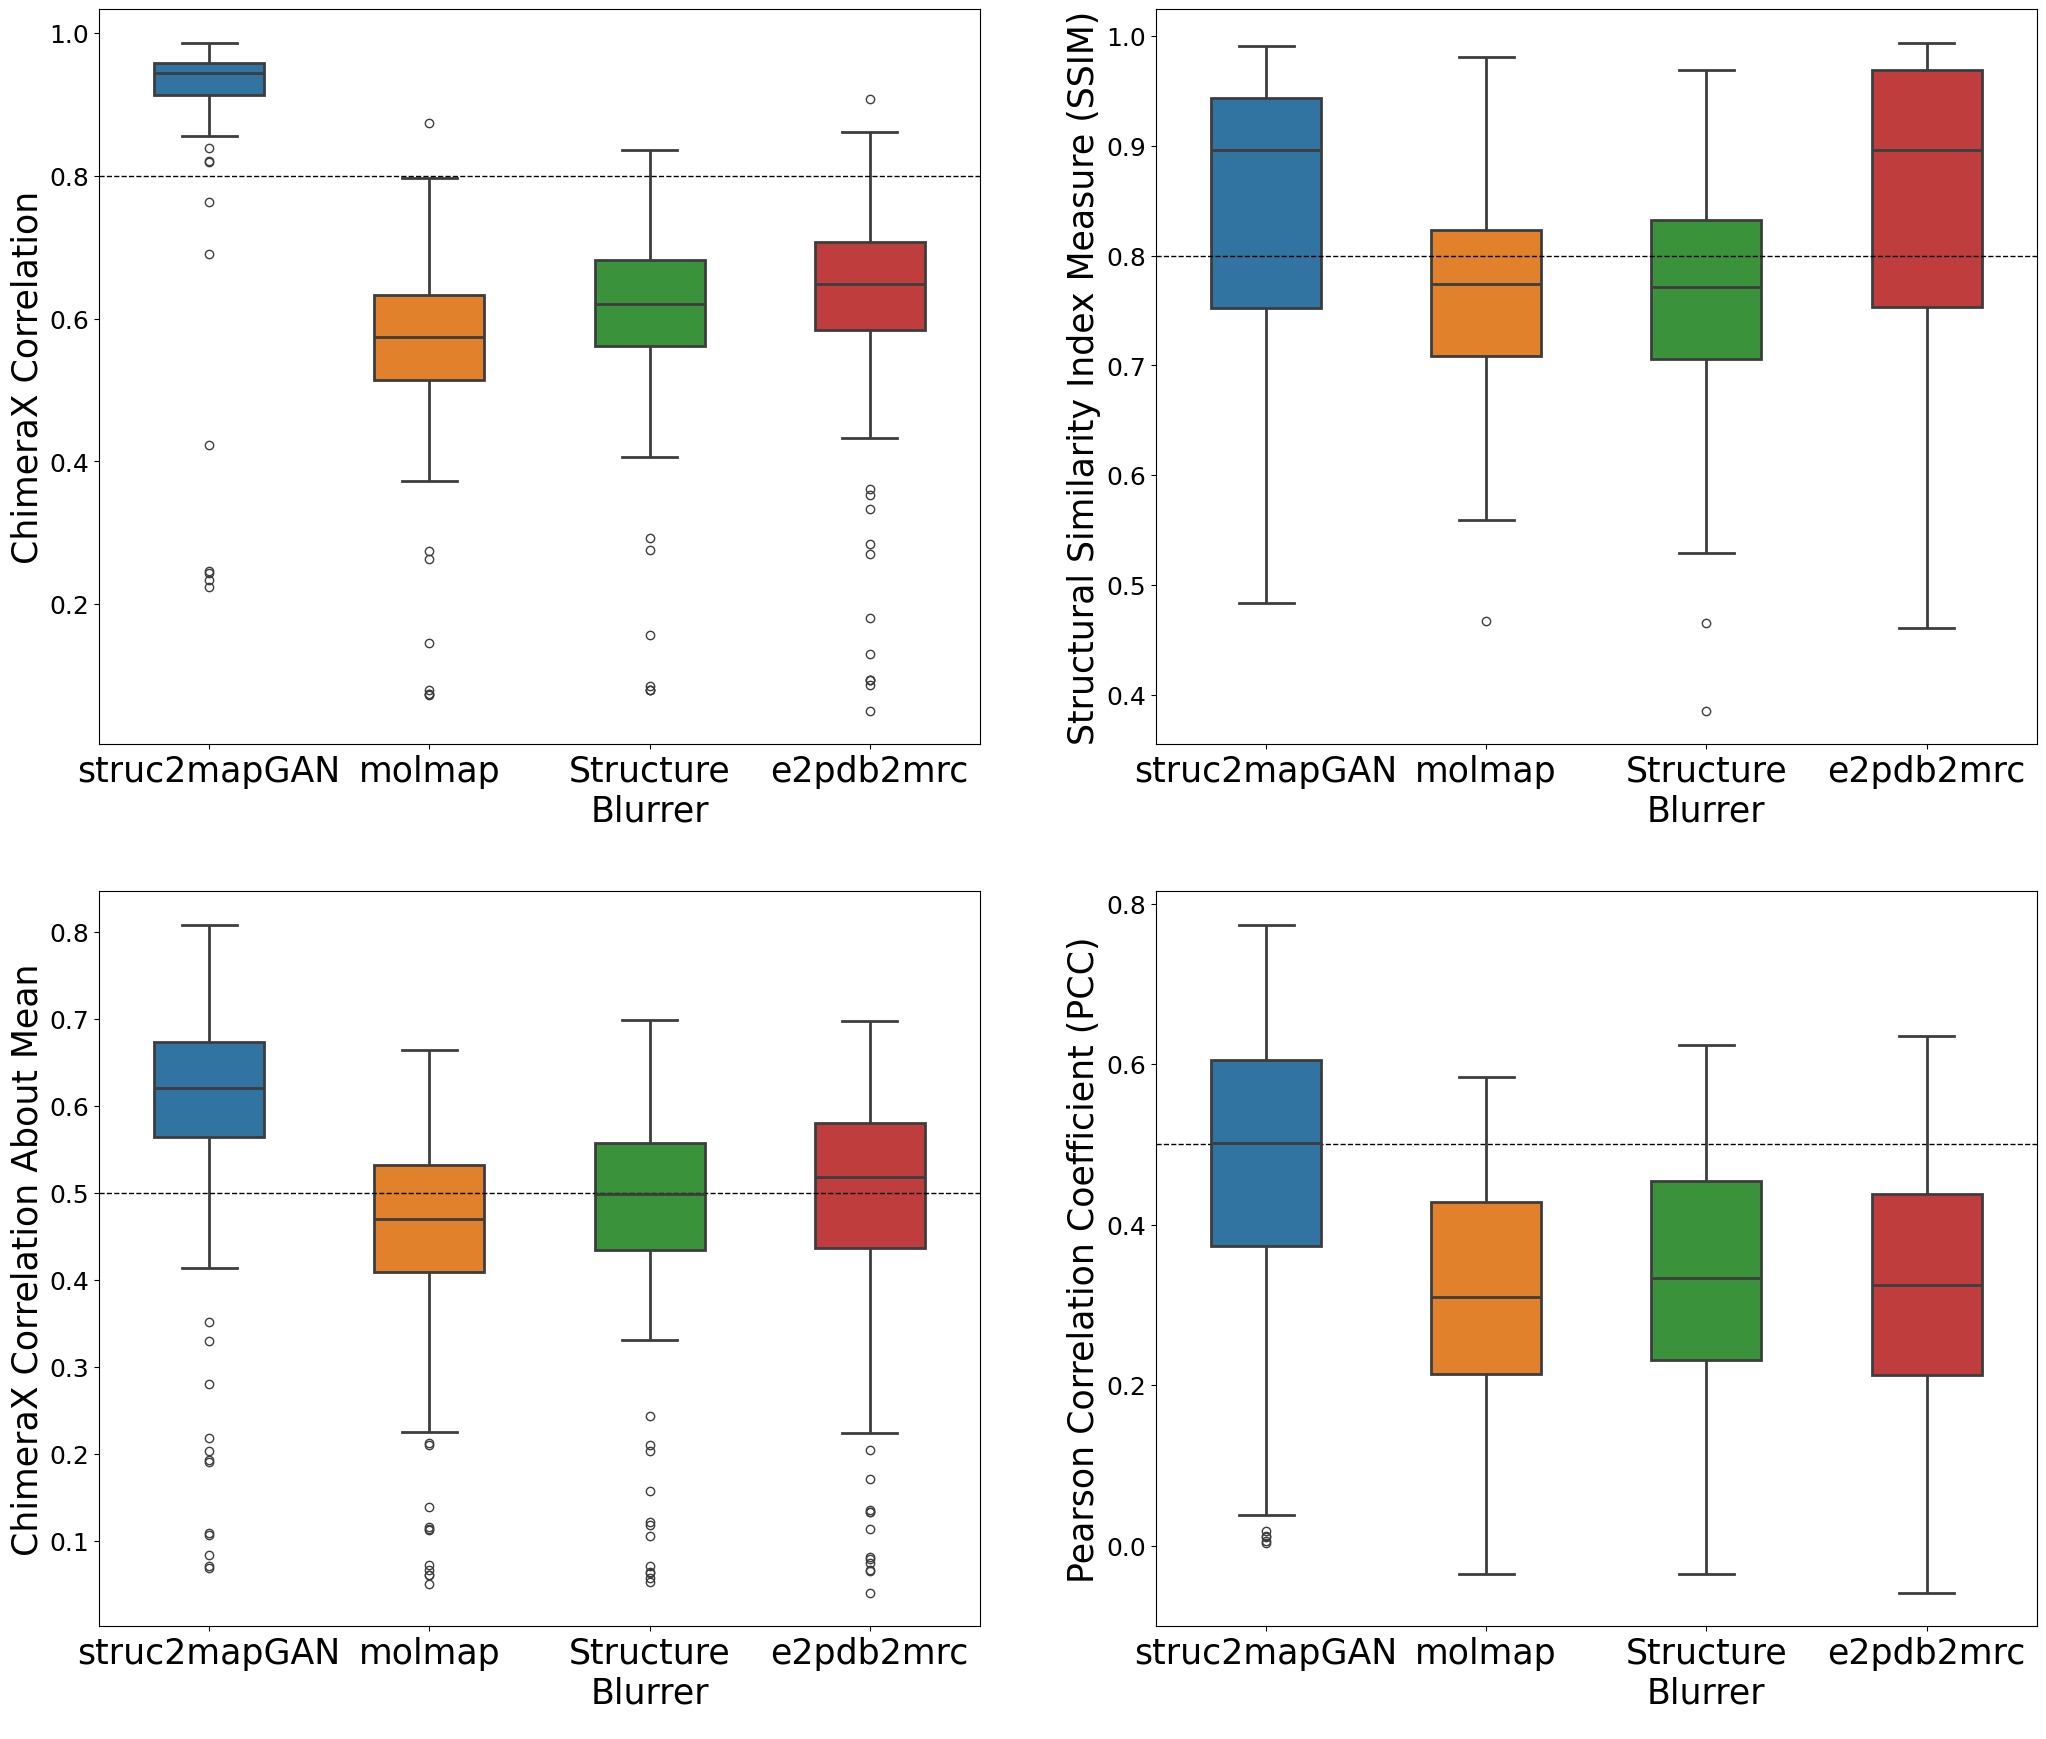

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_pcc and df_ssim are your DataFrame variables for PCC and SSIM data respectively.

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(25, 21))

# Set font size
fontsize = 25  # Size for titles/labels/ticks
hlinewidth = 1

'''
PCC Box plot
'''
sns.boxplot(
    x='Method',
    y='Pearson Correlation',
    data=df_pcc,
    hue='Method',
    width=0.5,  # Box width
    linewidth=2,  # Line thickness of the box outline
    ax=axs[1,0]
)

axs[1,1].tick_params(labelsize=18) # Change the font size of the ticks
axs[1,1].set_xticklabels(['struc2mapGAN', 'molmap', 'Structure\nBlurrer', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
axs[1,1].set_xlabel(' ')  # No x-label
axs[1,1].set_ylabel('Pearson Correlation Coefficient (PCC)', fontsize=fontsize)
axs[1,1].axhline(y=0.5, color='k', linestyle='--', linewidth=hlinewidth)

'''
SSIM Box plot
'''
sns.boxplot(
    x='Method',
    y='SSIM',
    data=df_ssim,
    hue='Method',
    width=0.5,  # Box width
    linewidth=2,  # Line thickness of the box outline
    ax=axs[0,1]
)

axs[0,1].tick_params(labelsize=18) # Change the font size of the ticks
axs[0,1].set_xticklabels(['struc2mapGAN', 'molmap', 'Structure\nBlurrer', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
axs[0,1].set_xlabel('')  # No x-label
axs[0,1].set_ylabel('Structural Similarity Index Measure (SSIM)', fontsize=fontsize)
axs[0,1].axhline(y=0.8, color='k', linestyle='--', linewidth=hlinewidth)


'''
Correlation Box plot
'''
sns.boxplot(
    x='Method',
    y='Correlation',
    data=df_corr,
    hue='Method',
    width=0.5,  # Box width
    linewidth=2,  # Line thickness of the box outline
    ax=axs[0,0]
)

axs[0,0].tick_params(labelsize=18) # Change the font size of the ticks
axs[0,0].set_xticklabels(['struc2mapGAN', 'molmap', 'Structure\nBlurrer', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
axs[0,0].set_xlabel('')  # No x-label
axs[0,0].set_ylabel('ChimeraX Correlation', fontsize=fontsize)
axs[0,0].axhline(y=0.8, color='k', linestyle='--', linewidth=hlinewidth)

'''
Correlation About Mean Box plot
'''
sns.boxplot(
    x='Method',
    y='Correlation_About_Mean',
    data=df_corr_about_mean,
    hue='Method',
    width=0.5,  # Box width
    linewidth=2,  # Line thickness of the box outline
    ax=axs[1,1]
)
ax = axs[1,0]
ax.tick_params(labelsize=18) # Change the font size of the ticks
ax.set_xticklabels(['struc2mapGAN', 'molmap', 'Structure\nBlurrer', 'e2pdb2mrc'], fontsize=fontsize)  # Set custom labels for the x-axis
ax.set_xlabel('')  # No x-label
ax.set_ylabel('ChimeraX Correlation About Mean', fontsize=fontsize)
ax.axhline(y=0.5, color='k', linestyle='--', linewidth=hlinewidth) 


plt.show()

# # save to pdf
fig.savefig('comp_boxplot.pdf', bbox_inches='tight')

#### Scatter plot

In [8]:
# sort the df based on 'Resolution'
df_sorted = df.sort_values('Resolution')
# df_sorted = df # no sort

df_ssim_scatter = pd.DataFrame(
    {
        'GAN': df_sorted['SSIM-GAN'],
        'molmap': df_sorted['SSIM-molmap'],
        'molmap(reported_res)': df_sorted['SSIM-molmap-ogres'],
        'index': np.arange(130)
    }
)
df_corr_scatter = pd.DataFrame(
    {
        'GAN': df_sorted['Correlation-GAN'],
        'molmap': df_sorted['Correlation-molmap'],
        'molmap(reported_res)': df_sorted['Correlation-molmap-ogres'],
        'index': np.arange(130)
    }
)
df_pcc_scatter = pd.DataFrame(
    {
        'GAN': df_sorted['PCC-GAN'],
        'molmap': df_sorted['PCC-molmap'],
        'molmap(reported_res)': df_sorted['PCC-molmap-ogres'],
        'index': np.arange(130)
    }
)
df_ssim_scatter = pd.melt(df_ssim_scatter, id_vars=['index'], value_vars=['GAN', 'molmap', 'molmap(reported_res)'], var_name='Method', value_name='SSIM')
df_corr_scatter = pd.melt(df_corr_scatter, id_vars=['index'], value_vars=['GAN', 'molmap', 'molmap(reported_res)'], var_name='Method', value_name='Correlation')
df_pcc_scatter = pd.melt(df_pcc_scatter, id_vars=['index'], value_vars=['GAN', 'molmap', 'molmap(reported_res)'], var_name='Method', value_name='PCC')

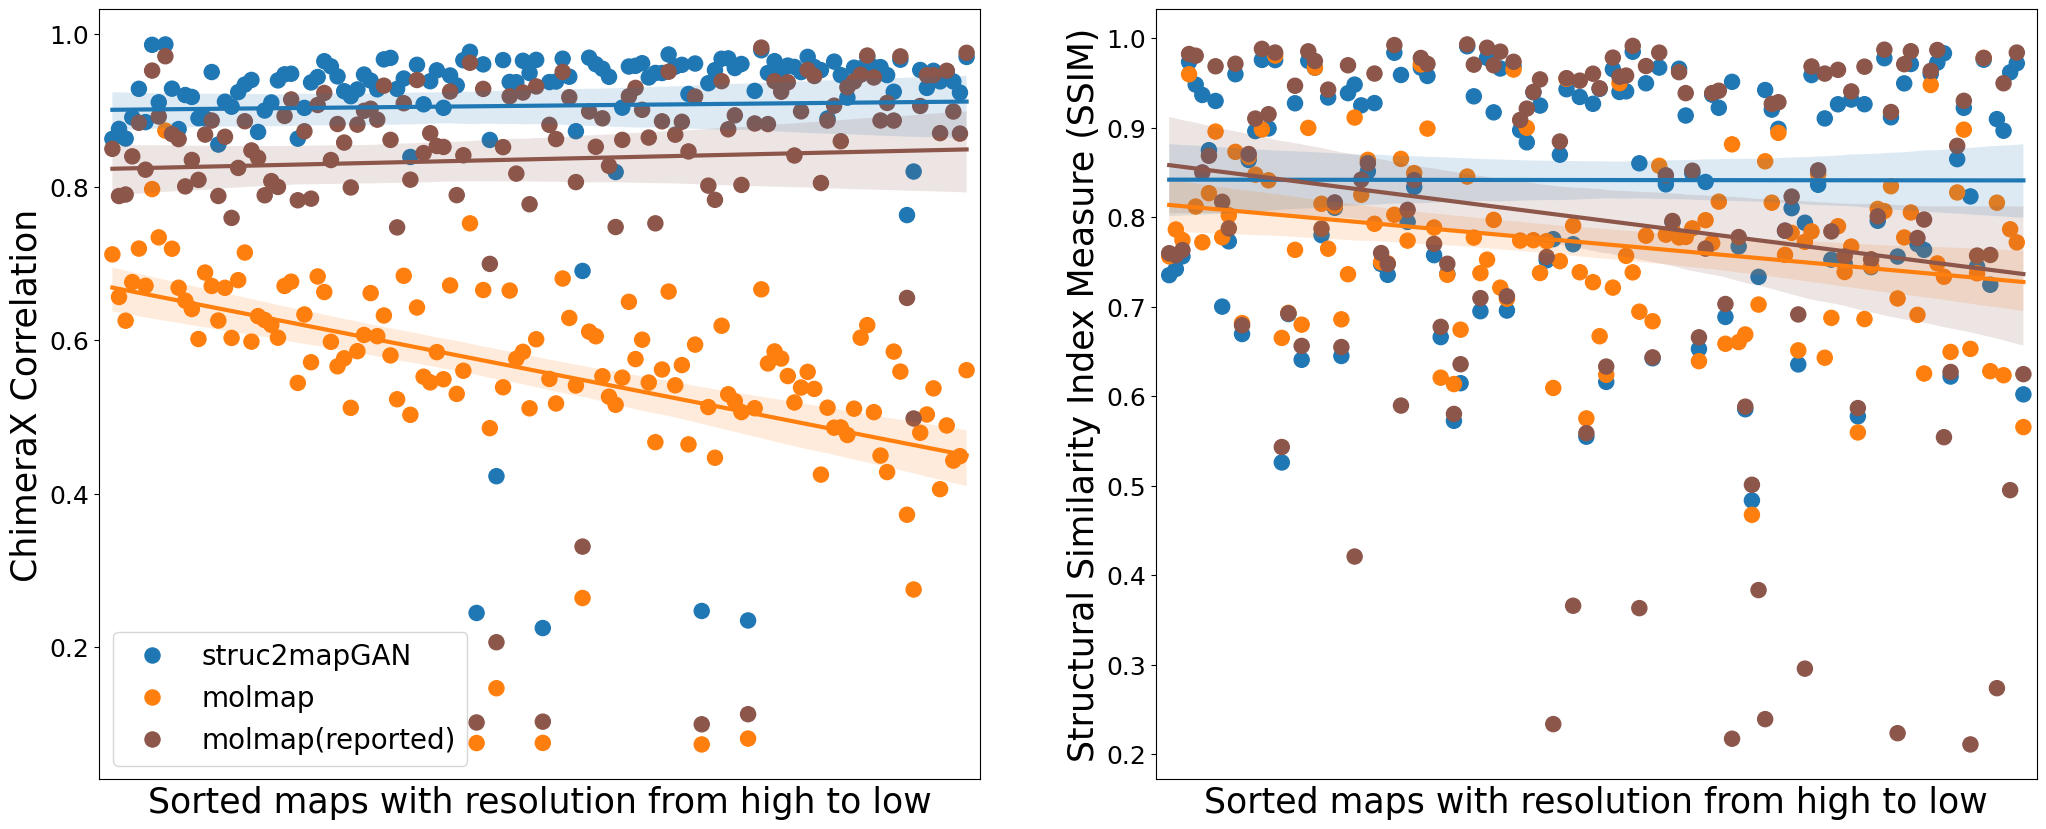

In [9]:
# plot the correlation and ssim scatter plot
fig, axs = plt.subplots(1, 2, figsize=(25, 10))

# Set font size
fontsize = 25  # Size for titles/labels/ticks
markersize = 120
hlinewidth = 1

colors = sns.color_palette("tab10")
method_colors = {'GAN': colors[0], 'molmap': colors[1], 'molmap(reported_res)': colors[5]}

    
'''
Correlation Scatter plot
'''
sns.scatterplot(
    x='index',
    y='Correlation',
    data=df_corr_scatter,
    hue='Method',
    s=markersize,
    palette=method_colors,
    edgecolor=None,
    ax=axs[0]    
)
# Add the regression lines
for method in ['GAN', 'molmap', 'molmap(reported_res)']:
    data = df_corr_scatter[df_corr_scatter['Method'] == method]
    sns.regplot(
        x='index',
        y='Correlation',
        data=data,
        scatter=False,
        color=method_colors[method],
        ax=axs[0],
        line_kws={'linewidth': 3}
    )
axs[0].tick_params(labelsize=18) # Change the font size of the ticks
axs[0].set_xticks([])
axs[0].set_xlabel('Sorted maps with resolution from high to low', fontsize=fontsize)
axs[0].set_ylabel('ChimeraX Correlation', fontsize=fontsize)
# axs[0].axhline(y=0.8, color='k', linestyle='--', linewidth=hlinewidth)
axs[0].set_xlim(-2, 131)
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, ['struc2mapGAN', 'molmap', 'molmap(reported)'], fontsize=20)


'''
SSIM Scatter plot
'''
sns.scatterplot(
    x='index',
    y='SSIM',
    data=df_ssim_scatter,
    hue='Method',
    palette=method_colors,
    s=markersize,
    edgecolor=None,
    ax=axs[1],
    legend=False
)
# Add the regression lines
for method in ['GAN', 'molmap', 'molmap(reported_res)']:
    data = df_ssim_scatter[df_ssim_scatter['Method'] == method]
    sns.regplot(
        x='index',
        y='SSIM',
        data=data,
        scatter=False,
        color=method_colors[method],
        ax=axs[1],
        line_kws={'linewidth': 3}
    )
axs[1].tick_params(labelsize=18)
axs[1].set_xticks([])
axs[1].set_xlabel('Sorted maps with resolution from high to low', fontsize=fontsize)
axs[1].set_ylabel('Structural Similarity Index Measure (SSIM)', fontsize=fontsize)
# axs[1].axhline(y=0.8, color='k', linestyle='--', linewidth=hlinewidth)
axs[1].set_xlim(-2, 131)

plt.show()


# save to pdf
fig.savefig('scatter_plot.pdf', bbox_inches='tight')

In [ ]:
# # plot the correlation and ssim scatter plot
# fig, axs = plt.subplots(1, 3, figsize=(40, 10))

# # Set font size
# fontsize = 25  # Size for titles/labels/ticks
# markersize = 120
# hlinewidth = 1

# colors = sns.color_palette("tab10")
# method_colors = {'GAN': colors[0], 'molmap': colors[1]}

    
# '''
# Correlation Scatter plot
# '''
# sns.scatterplot(
#     x='index',
#     y='Correlation',
#     data=df_corr_scatter,
#     hue='Method',
#     s=markersize,
#     edgecolor=None,
#     ax=axs[0]    
# )
# # Add the regression lines
# for method in ['GAN', 'molmap']:
#     data = df_corr_scatter[df_corr_scatter['Method'] == method]
#     sns.regplot(
#         x='index',
#         y='Correlation',
#         data=data,
#         scatter=False,
#         color=method_colors[method],
#         ax=axs[0],
#         line_kws={'linewidth': 3}
#     )
# axs[0].tick_params(labelsize=18) # Change the font size of the ticks
# axs[0].set_xticks([])
# axs[0].set_xlabel('Sorted maps with resolution from high to low', fontsize=fontsize)
# axs[0].set_ylabel('ChimeraX Correlation', fontsize=fontsize)
# axs[0].axhline(y=0.8, color='k', linestyle='--', linewidth=hlinewidth)
# axs[0].set_xlim(-2, 131)
# handles, labels = axs[0].get_legend_handles_labels()
# axs[0].legend(handles, ['MRC-GAN', 'molmap'], fontsize=fontsize)


# '''
# SSIM Scatter plot
# '''
# sns.scatterplot(
#     x='index',
#     y='SSIM',
#     data=df_ssim_scatter,
#     hue='Method',
#     s=markersize,
#     edgecolor=None,
#     ax=axs[1],
#     legend=False
# )
# # Add the regression lines
# for method in ['GAN', 'molmap']:
#     data = df_ssim_scatter[df_ssim_scatter['Method'] == method]
#     sns.regplot(
#         x='index',
#         y='SSIM',
#         data=data,
#         scatter=False,
#         color=method_colors[method],
#         ax=axs[1],
#         line_kws={'linewidth': 3},
#     )
# axs[1].tick_params(labelsize=18)
# axs[1].set_xticks([])
# axs[1].set_xlabel('Sorted maps with resolution from high to low', fontsize=fontsize)
# axs[1].set_ylabel('Structural Similarity Index Measure (SSIM)', fontsize=fontsize)
# axs[1].axhline(y=0.8, color='k', linestyle='--', linewidth=hlinewidth)
# axs[1].set_xlim(-2, 131)


# '''
# PCC Scatter plot
# '''

# sns.scatterplot(
#     x='index',
#     y='PCC',
#     data=df_pcc_scatter,
#     hue='Method',
#     s=markersize,
#     edgecolor=None,
#     ax=axs[2],
#     legend=False
# )
# # Add the regression lines
# for method in ['GAN', 'molmap']:
#     data = df_pcc_scatter[df_pcc_scatter['Method'] == method]
#     sns.regplot(
#         x='index',
#         y='PCC',
#         data=data,
#         scatter=False,
#         color=method_colors[method],
#         ax=axs[2],
#         line_kws={'linewidth': 3}
#     )
# axs[2].tick_params(labelsize=18)
# axs[2].set_xticks([])
# axs[2].set_xlabel('Sorted maps with resolution from high to low', fontsize=fontsize)
# axs[2].set_ylabel('Pearson Correlation Coefficient (PCC)', fontsize=fontsize)
# axs[2].axhline(y=0.5, color='k', linestyle='--', linewidth=hlinewidth)
# axs[2].set_xlim(-2, 131)


# plt.show()


### Inference time

In [26]:
df['Residues'].max()

12868

In [27]:
df_time = pd.DataFrame(
    {
        'Residues': df['Residues'],
        'Time': df['Inference time (s)'],
    }
)

df_time

,Residues,Time
0,8544,26.645612
1,7512,25.043803
2,2862,23.097357
3,8208,22.304340
4,7451,28.570023
...,...,...
125,2644,20.977712
126,2092,17.859725
127,2589,20.043203
128,2257,20.828561


In [28]:
df_time_sort = df_time.sort_values('Residues')
df_time_sort

,Residues,Time
6,167,13.843191
25,332,14.544363
129,505,17.681915
94,584,15.570630
118,644,14.932632
...,...,...
67,9139,46.106689
20,9173,31.331997
39,10860,28.335806
82,12270,35.915409


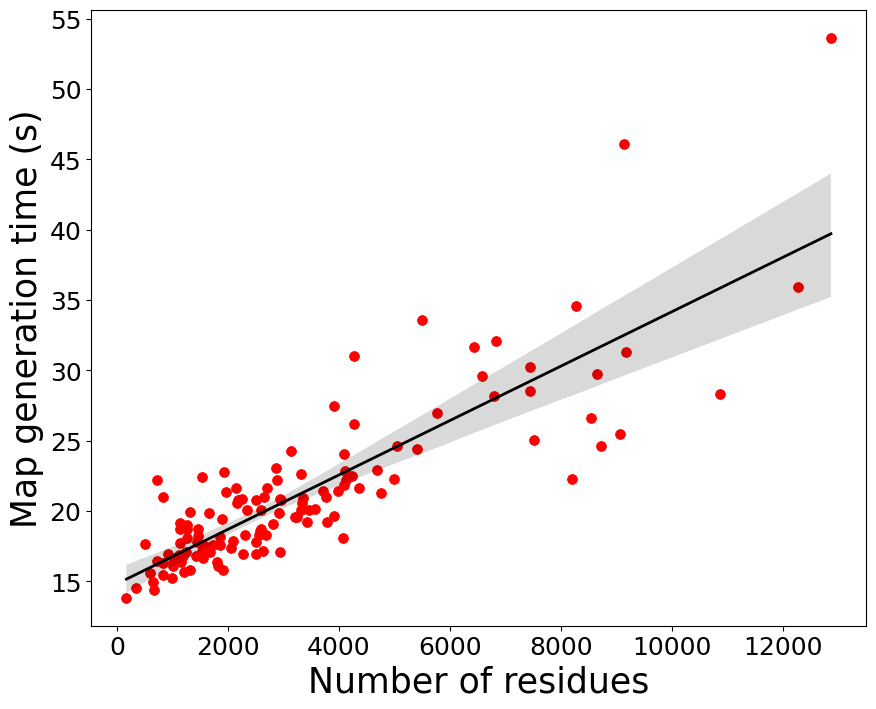

In [31]:
df['Residues']

# plot the inference time against the number of residues
fig, ax = plt.subplots(figsize=(10, 8))

# Set font size
fontsize = 25  # Size for titles/labels/ticks
markersize = 50
hlinewidth = 2

sns.scatterplot(
    x='Residues',
    y='Time',
    data=df_time,
    s=markersize,
    color='r',
    edgecolor=None,
)

sns.regplot(
    x='Residues',
    y='Time',
    data=df_time,
    scatter=False,
    color='k',
    line_kws={'linewidth': hlinewidth}
)

# Set the font size of the ticks
ax.tick_params(labelsize=18)
ax.set_xlabel('Number of residues', fontsize=fontsize)
ax.set_ylabel('Map generation time (s)', fontsize=fontsize)

# # also show distribution of the data
# sns.histplot(
#     x='Residues',
#     data=df_time,
#     bins=20,
#     color='b',
#     alpha=0.5,
#     kde=True,
#     ax=ax.twinx(),
# )

plt.show()

# save to pdf
fig.savefig('inference_time.pdf', bbox_inches='tight')


### Ablation study

#### Table

In [78]:
pcc_value = ['PCC-GAN', 'PCC-GAN-Ablation', 'PCC-GAN-Rawmap']
ssim_value = ['SSIM-GAN', 'SSIM-GAN-Ablation', 'SSIM-GAN-Rawmap']
corr_value = ['Correlation-GAN', 'Correlation-GAN-Ablation', 'Correlation-GAN-Rawmap']
corr_about_mean_value = ['Correlation_Average-GAN', 'Correlation_Average-GAN-Ablation', 'Correlation_Average-GAN-Rawmap']


#### Box plot

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import pandas as pd

# data = {
#     'baseline': {
#         'ChimeraX Correlation': df['Correlation-GAN'],
#         'SSIM': df['SSIM-GAN']
#     },
#     'w/o L1': {
#         'ChimeraX Correlation': df['Correlation-GAN-Ablation'],
#         'SSIM': df['SSIM-GAN-Ablation']
#     },    
#     'RawMaps': {
#         'ChimeraX Correlation': df['Correlation-GAN-Rawmap'],
#         'SSIM': df['SSIM-GAN-Rawmap']
#     }
# }
# df_ab = pd.DataFrame({
#     'Method': np.repeat(['baseline', 'w/o L1', 'RawMaps'], 260),
#     'Metric': np.tile(np.repeat(['Correlation', 'SSIM'], 130), 3),
#     'Value': np.concatenate([data['baseline']['ChimeraX Correlation'], data['baseline']['SSIM'],
#                             data['w/o L1']['ChimeraX Correlation'], data['w/o L1']['SSIM'],
#                             data['RawMaps']['ChimeraX Correlation'], data['RawMaps']['SSIM']])
#     })
# # Plotting
# fig, ax = plt.subplots(figsize=(10, 6))

# # Set font size
# fontsize = 20  # Size for titles/labels/ticks
# legendsize=15
# hlinewidth = 1

# colors = [sns.color_palette("tab10")[0], sns.color_palette("tab10")[7], sns.color_palette("tab10")[8]]
# meanprops = {"marker": "*", "markerfacecolor": "red", "markeredgecolor": "red", "markersize": "20"}

# ax = sns.boxplot(
#     x='Metric',
#     y='Value',
#     hue='Method',
#     data=df_ab,
#     # width=0.5,  # Box width
#     # linewidth=2,  # Line thickness of the box outline
#     palette=colors,
#     showmeans=True,
#     meanprops=meanprops,
#     ax=ax
# )

# ax.axhline(y=0.8, color='k', linestyle='--', linewidth=hlinewidth)
# ax.tick_params(labelsize=18)  # Change the font size of the ticks
# ax.set_xlabel('')
# ax.set_xticklabels(['ChimeraX Correlation', 'SSIM'], fontsize=fontsize)
# ax.set_ylabel('Score', fontsize=fontsize)
# ax.legend(title='Method', fontsize=legendsize, title_fontsize=legendsize)

# plt.show()

# fig.savefig('ablation_boxplot.pdf', bbox_inches='tight')

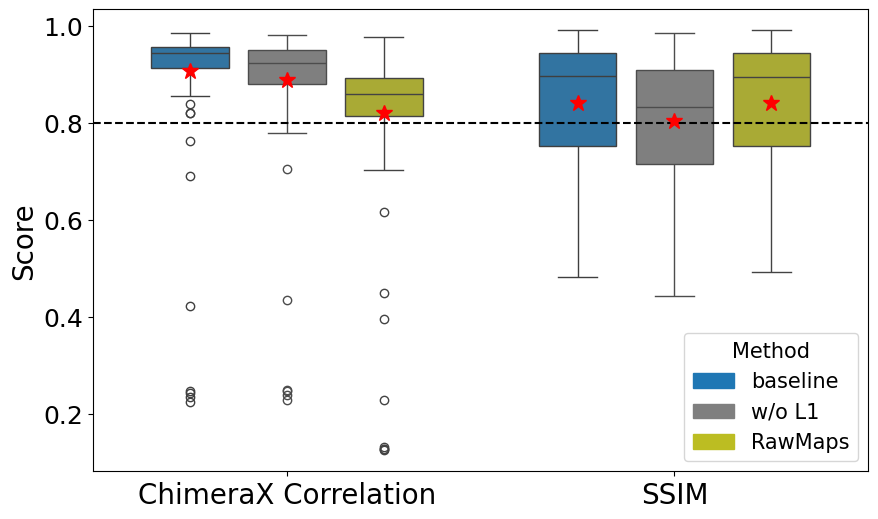

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches


# Sample data construction
data = {
    'baseline': {
        'ChimeraX Correlation': df['Correlation-GAN'],
        'SSIM': df['SSIM-GAN']
    },
    'w/o L1': {
        'ChimeraX Correlation': df['Correlation-GAN-Ablation'],
        'SSIM': df['SSIM-GAN-Ablation']
    },    
    'RawMaps': {
        'ChimeraX Correlation': df['Correlation-GAN-Rawmap'],
        'SSIM': df['SSIM-GAN-Rawmap']
    }
}

df_ab = pd.DataFrame({
    'Method': np.repeat(['baseline', 'w/o L1', 'RawMaps'], 260),
    'Metric': np.tile(np.repeat(['ChimeraX Correlation', 'SSIM'], 130), 3),
    'Value': np.concatenate([data['baseline']['ChimeraX Correlation'], data['baseline']['SSIM'],
                            data['w/o L1']['ChimeraX Correlation'], data['w/o L1']['SSIM'],
                            data['RawMaps']['ChimeraX Correlation'], data['RawMaps']['SSIM']])
})


# Setup for plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = [sns.color_palette("tab10")[0], sns.color_palette("tab10")[7], sns.color_palette("tab10")[8]]
meanprops = {"marker": "*", "markerfacecolor": "red", "markeredgecolor": "red", "markersize": "12"}

# Set font size
fontsize = 20  # Size for titles/labels/ticks
legendsize=15
hlinewidth = 0.8

# Manual positions
positions = {
    'baseline': [1, 5],
    'w/o L1': [2, 6],
    'RawMaps': [3, 7]
}

# Plot each method separately with correct positions for each metric
for method, pos in positions.items():
    sns.boxplot(
        x='Metric', 
        y='Value', 
        data=df_ab[df_ab['Method'] == method],
        color=colors[list(positions.keys()).index(method)],
        width=0.8,
        showmeans=True,
        meanprops=meanprops,
        ax=ax,
        positions=pos  # Use the custom positions defined
    )

# customizing the plot 
ax.set_xlim(0, 8)
ax.tick_params(labelsize=18)
ax.set_xticks([2, 6])
ax.set_xticklabels(['ChimeraX Correlation', 'SSIM'], fontsize=fontsize)
ax.axhline(y=hlinewidth, color='k', linestyle='--')
ax.set_ylabel('Score', fontsize=fontsize)
ax.set_xlabel('')

# Customize legend handles
legend_handles = [mpatches.Patch(color=colors[i], label=method) for i, method in enumerate(['baseline', 'w/o L1', 'RawMaps'])]
ax.legend(handles=legend_handles, title='Method', fontsize=legendsize, title_fontsize=legendsize)

plt.show()

# save to pdf
fig.savefig('ablation_boxplot.pdf', bbox_inches='tight')


### Loss plots

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../paper_benchmark/loss_plot.csv')
df

In [ ]:
# line plot for loss

# Set font size
fontsize = 25  # Size for titles/labels/ticks
linewidth = 5

fig, axs1 = plt.subplots(figsize=(30, 12))

'''
Loss plot
'''
sns.lineplot(
    x='epoch',
    y='val_loss_G',
    data=df,
    linewidth=linewidth,
    color='black',
    ax=axs1,
    label='Generator Loss'
)
# Set the font size of the ticks
axs1.tick_params(labelsize=18)
axs1.set_xlabel('Epoch', fontsize=fontsize)
axs1.set_ylabel('Validation Loss (Generator)', fontsize=fontsize)

# Create a second y-axis that shares the same x-axis
axs2 = axs1.twinx()
sns.lineplot(
    x='epoch',
    y='val_loss_D',
    data=df,
    linewidth=linewidth,
    color='red',
    ax=axs2,
    label='Discriminator Loss',
    legend=False
)
axs2.tick_params(labelsize=18)
axs2.set_xlabel('')
axs2.set_ylabel('Validation Loss (Discriminator)', fontsize=fontsize)

# Combine legends
lines1, labels1 = axs1.get_legend_handles_labels()
lines2, labels2 = axs2.get_legend_handles_labels()
axs1.legend(lines1 + lines2, labels1 + labels2, fontsize=fontsize)

plt.show()


fig.savefig('loss_plot.pdf', bbox_inches='tight')
# save to high quality png
fig.savefig('loss_plot.png', bbox_inches='tight', dpi=400)

### MRC

In [ ]:
import mrcfile
import numpy as np

In [ ]:
mrc = mrcfile.open('./paper_benchmark/test_gan_data/eman_new/3iyj_e2pdb2mrc_resample.mrc', mode='r')

In [ ]:
mrc.data.shape, mrc.data.max()

In [ ]:
mrc = mrcfile.open('./paper_benchmark/test_gan_data/eman_new/3iyj_e2pdb2mrc.mrc', mode='r')
mrc.data.shape, mrc.data.max()

In [ ]:
mrc_exp = mrcfile.open('./paper_benchmark/test_exp_data/emd_5376.map', mode='r')

In [ ]:
mrc_exp.data.shape

In [ ]:
np.sum(data[data>0])

In [ ]:
mrct = mrcfile.open('./3j2w_test.mrc', mode='r')

In [ ]:
mrct.data.shape

### CSV file

In [ ]:
import pandas as pd
import numpy as np

df_csv = pd.read_csv('./paper_benchmark/inference_data.csv', dtype={'PDBID': str, 'EMID': str, 'Resolution': float, 'Inference-Time (s)': float, 'PCC_gan': float, 'PCC_StructureBlurrer': float, 'PCC_molmap': float, 'SSIM_gan': float, 'SSIM_StructureBlurrer': float, 'SSIM_molmap': float, 'PCC_e2pdb2mrc': float, 'SSIM_e2pdb2mrc': float})

In [ ]:
df_csv

In [ ]:
# calculation

column_names = ["PCC_StructureBlurrer", "PCC_molmap", "PCC_e2pdb2mrc", "PCC_gan", "PCC_gan_ablation", 
                "SSIM_StructureBlurrer", "SSIM_molmap",  "SSIM_e2pdb2mrc",  "SSIM_gan",  "SSIM_gan_ablation", 
                "Correlation_StructureBlurrer", "Correlation_molmap", "Correlation_e2pdb2mrc", "Correlation_gan", "Correlation_gan_ablation",
                "Correlation_About_Mean_StructureBlurrer", "Correlation_About_Mean_molmap",  "Correlation_About_Mean_e2pdb2mrc", "Correlation_About_Mean_gan", "Correlation_About_Mean_gan_ablation"]

mean_values = df_csv[column_names].mean()
mean_values

In [ ]:
median_values = df_csv[column_names].median()
median_values

#### Find NaN rows

In [ ]:
# find where is NaN
nan_SSIM_e2pdb2mrc = np.where(df_csv['SSIM_e2pdb2mrc'].isna())[0]
nan_SSIM_e2pdb2mrc, nan_SSIM_e2pdb2mrc.shape

In [ ]:
zero_SSIM_e2pdb2mrc = np.where(df_csv['Correlation_e2pdb2mrc']==0)[0]
zero_SSIM_e2pdb2mrc, zero_SSIM_e2pdb2mrc.shape


In [ ]:
nan_Correlation_StructureBlurrer = np.where(df_csv['Correlation_StructureBlurrer'].isna())[0]
nan_Correlation_StructureBlurrer

In [ ]:
row1 = np.union1d(nan_SSIM_e2pdb2mrc, zero_SSIM_e2pdb2mrc)
row1, row1.shape

In [ ]:
row2 = np.union1d(row1, nan_Correlation_StructureBlurrer)
row2, row2.shape

In [ ]:
row3 = np.union1d(row2, [1,8])
row3, row3.shape

In [ ]:
df_drop = df_csv.drop(row3)
df_drop

In [ ]:
# calculate new mean and median for dropped data

column_names = ["PCC_StructureBlurrer", "PCC_molmap", "PCC_e2pdb2mrc", "PCC_gan", "PCC_gan_ablation", 
                "SSIM_StructureBlurrer", "SSIM_molmap",  "SSIM_e2pdb2mrc",  "SSIM_gan",  "SSIM_gan_ablation", 
                "Correlation_StructureBlurrer", "Correlation_molmap", "Correlation_e2pdb2mrc", "Correlation_gan", "Correlation_gan_ablation",
                "Correlation_About_Mean_StructureBlurrer", "Correlation_About_Mean_molmap",  "Correlation_About_Mean_e2pdb2mrc", "Correlation_About_Mean_gan", "Correlation_About_Mean_gan_ablation"]

mean_values = df_drop[column_names].mean()
mean_values


In [ ]:
median_values = df_drop[column_names].median()
median_values

In [ ]:
# # save the new csv

# column_order = ["PDBID", "EMID", "Resolution", "Inference-Time (s)", 
#                 "PCC_StructureBlurrer", "PCC_molmap", "PCC_e2pdb2mrc", "PCC_gan", "PCC_gan_ablation", 
#                 "SSIM_StructureBlurrer", "SSIM_molmap",  "SSIM_e2pdb2mrc",  "SSIM_gan",  "SSIM_gan_ablation", 
#                 "Correlation_StructureBlurrer", "Correlation_molmap", "Correlation_e2pdb2mrc", "Correlation_gan", "Correlation_gan_ablation",
#                 "Correlation_About_Mean_StructureBlurrer", "Correlation_About_Mean_molmap",  "Correlation_About_Mean_e2pdb2mrc", "Correlation_About_Mean_gan", "Correlation_About_Mean_gan_ablation"]
    
# df_drop = df_drop[column_order]
# df_drop.to_csv('./paper_benchmark/inference_data_new.csv', index=False)

In [ ]:
df_csv = pd.read_csv('./paper_benchmark/inference_data_new.csv', dtype={'PDBID': str, 'EMID': str, 'Resolution': float, 'Inference-Time (s)': float, 'PCC_gan': float, 'PCC_StructureBlurrer': float, 'PCC_molmap': float, 'SSIM_gan': float, 'SSIM_StructureBlurrer': float, 'SSIM_molmap': float, 'PCC_e2pdb2mrc': float, 'SSIM_e2pdb2mrc': float})

# calculation

column_names = ["PCC_StructureBlurrer", "PCC_molmap", "PCC_e2pdb2mrc", "PCC_gan", "PCC_gan_ablation", 
                "SSIM_StructureBlurrer", "SSIM_molmap",  "SSIM_e2pdb2mrc",  "SSIM_gan",  "SSIM_gan_ablation", 
                "Correlation_StructureBlurrer", "Correlation_molmap", "Correlation_e2pdb2mrc", "Correlation_gan", "Correlation_gan_ablation",
                "Correlation_About_Mean_StructureBlurrer", "Correlation_About_Mean_molmap",  "Correlation_About_Mean_e2pdb2mrc", "Correlation_About_Mean_gan", "Correlation_About_Mean_gan_ablation"]

mean_values = df_csv[column_names].mean()
mean_values



### Move files

In [ ]:
df_csv = pd.read_csv('./paper_benchmark/inference_data.csv', dtype={'PDBID': str, 'EMID': str, 'Resolution': float, 'Inference-Time (s)': float, 'PCC_gan': float, 'PCC_StructureBlurrer': float, 'PCC_molmap': float, 'SSIM_gan': float, 'SSIM_StructureBlurrer': float, 'SSIM_molmap': float, 'PCC_e2pdb2mrc': float, 'SSIM_e2pdb2mrc': float})
pdbs = df_csv['PDBID']
emdbs = df_csv['EMID']
pdbs, emdbs

In [ ]:
source_dir = './paper_benchmark/test_exp_data/'
new_dir = './paper_benchmark/new_dir/raw_map_pdb'

# move file to other dir
import shutil
import os

for pdb in pdbs:
    src = os.path.join(source_dir, f'{pdb}_ref.pdb')
    dst = os.path.join(new_dir, f'{pdb}_ref.pdb')
    shutil.move(src, dst)
    print(f'{pdb} moved')
    
    
    # rmdst1 = f'./paper_benchmark/test_gan_data/{pdb}_24-0517-132907-last_molmap_gan.mrc'
    # rmdst2 = f'./paper_benchmark/test_gan_data/{pdb}_24-0517-132907-last_molmap_gan_resample.mrc'
    # os.remove(rmdst1)
    # os.remove(rmdst2)
    
    
    